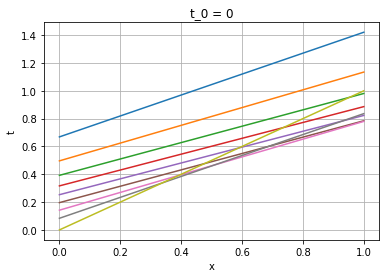

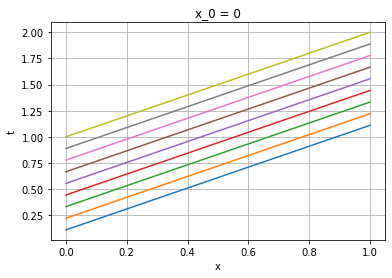

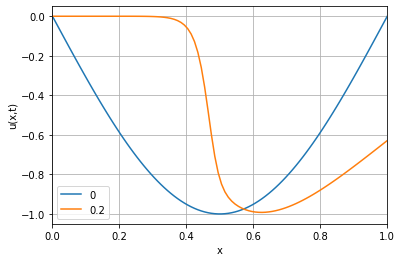

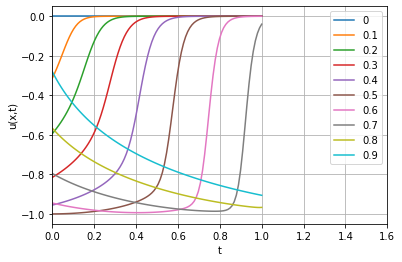

0.01 0.01
0.005 0.005
u[1]= 0.16398605080202455
0.0025 0.0025
u[2]= 0.1568837675994026
0.00125 0.00125
u[3]= 0.15472637908804132
0.000625 0.000625
u[4]= 0.15380187352201313


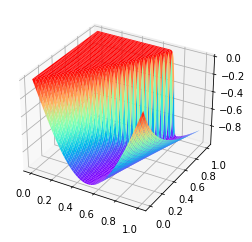

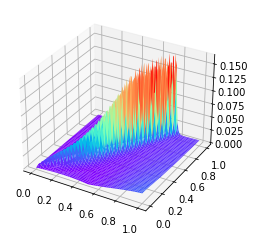

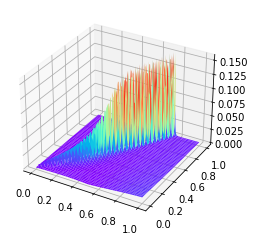

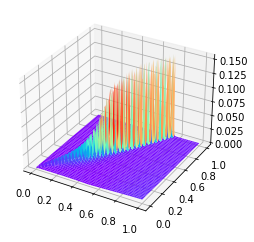

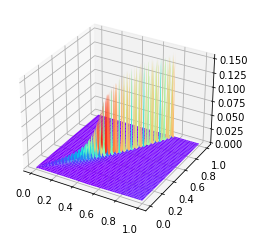

In [6]:
from numpy.ma.core import minimum
import numpy as np
from pylab import *
N, M = 100, 100
X, T = 1, 1
y = np.zeros((N, M), dtype=float)
x, t = np.linspace(0, X, N), np.linspace(0, T, M)
h = float(X)/(N)
τ = float(T)/(M)
eps = 0.000000001
t0=np.linspace(0, 1, 10)
x0=np.linspace(-1, 0, 10)
#график для случая начального условия t_0 = 0
fig, ax = plt.subplots()
for j in range(1, 10):
 ax.plot(x, (x - x0[j])/2/np.exp(-2*np.sin(np.pi*x0[j]))*(1+np.exp(-2*np.sin(np.pi*x0[j]))))
ax.set_xlabel("x")
ax.set_ylabel("t")
title('t_0 = 0')
grid()
plt.show()
#график для случая начального условия x_0 = 0
fig, ax = plt.subplots()
for j in range(1, 10):
 ax.plot(x, x + t0[j])
ax.set_xlabel("x")
ax.set_ylabel("t")
title('x_0 = 0')
grid()
plt.show()
#Метод Ньютона
y[:, 0] = -np.sin(np.pi*x)
y[0, :] = 0
def p(x):
 return np.log(1+np.exp(2*x))
def Dp(x):
 return 2*np.exp(2*x)/(1+np.exp(2*x))
def f(x, a, b):
 return (x-a)/τ + (p(x)-p(b))/h
def Df(x):
 return 1/τ + Dp(x)/h
def solve(a, b):
 result = b
 d = eps+1
 while (d > eps):
    y = result
    result = y-f(y, a, b)/Df(y)
    d = abs(result-y)
 return result
for i in range(1, N):
    for j in range(1, M):
        y[i, j] = solve(y[i, j-1], y[i-1, j])
#2D графики профиля u(x, t) при фиксированных t и x
for j in range(0, M, 50):
    plot(x,y[...,j])
    plt.legend(('0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8'))
    xlim(0, 1)
    plt.ylabel('u(x,t)')
plt.xlabel('x')
grid()
show()
for i in range(0, N, 10):
    plot(t,y[i,...])
    plt.legend(('0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'))
    xlim(0, 1.6)
    plt.ylabel('u(x,t)')
plt.xlabel('t')
grid()
show()
#Метод сгущения сетки
q=2
def calc(num):
 NN = N * q**num
 MM = M * q**num
 result = np.zeros((NN, MM), dtype=float)
 x, t = np.linspace(0, X, NN), np.linspace(0, T, MM)
 h = float(X)/(NN)
 τ = float(T)/(MM)
 print(h, τ)
 result[:, 0] = -np.sin(np.pi*x)
 result[0, :] = 0
 for i in range(1, NN):
    for j in range(1, MM):
        result[i, j] = solve(result[i, j-1], result[i-1, j])
 return result
def delta(a, b):
 for i in range(0, len(a)):
    for j in range(0, len(a[i])):
        a[i, j] = abs(a[i, j]-b[i*q, j*q])
 return a
#3D график
def grafic(a):
  fig = plt.figure()

  ax = fig.add_subplot(projection='3d')
  x, t = np.linspace(0, X, len(a)), np.linspace(0, T, len(a[1]))
  t, x = np.meshgrid(t, x)
  surf = ax.plot_surface(x, t, a, cmap='rainbow')
u=np.zeros((5), dtype=float)
y = calc(0)

y1 = calc(1)
grafic(y1)
y =delta(y, y1)
grafic(y)
u[1] = np.max(y)
print('u[1]=', u[1])
y2 = calc(2)
y1 = delta(y1, y2)
u[2] = np.max(y1)
grafic(y1)
print('u[2]=', u[2])
y3 = calc(3)
y2 = delta(y2, y3)
u[3] = np.max(y2)
grafic(y2)
print('u[3]=', u[3])
y4 = calc(4)
y3 = delta(y3, y4)
u[4] = np.max(y3)
grafic(y3)
print('u[4]=', u[4])